In [2]:
Observation Trend 1: CBS seems to have the most positive sentiment score followed by BBC
Observation Trend 2: CNN seems to have the most negative sentiment score
Observation Trend 3: Fox news and NYtimes seems to be having a close to a neutral score

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import tweepy
import matplotlib.pyplot as plt
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
consumer_key = "qWjW9sU3TXSmxK1K99cTKg21w"
consumer_secret = "efw3jTAtQ2YrMsEJK68C2HWCwbUgAH5tPq3aeu2e3cMJ16M6qb"
access_token = "932691218248622080-b6ji2lUfPUDLFEdPxHFDtz8c4Z3tgVg"
access_token_secret = "wHcODgWa0WRPxQu6OPdokd0p6uQjNH7LWvkUUHo132HBw"

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [27]:
twitter_accounts = ('@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes')
sentiments = []

for account in twitter_accounts:
    
    # gather tweets from news accounts
    news_tweets = api.user_timeline(id=account, count =100)
    
    # set tweet counter
    tweet_count = 100
    
    # loop through tweets
    for tweet in news_tweets:
        
        # retrive timestamp of tweet
        timestamp = tweet['created_at']
        tweet_date = datetime.strptime(timestamp, '%a %b %d %H:%M:%S %z %Y').date()
        
        # retrive tweet text
        text = tweet['text']
        
        # analyze tweet
        scores = analyzer.polarity_scores(text)
        
        # add news account to scores dictionary
        scores['News_Source'] = account
        
        # add date to scores dictionary
        scores['Date'] = converted_timestamp
        
        # add tweet Number to scores dictionary
        scores['Tweet_Number'] = tweet_count
        tweet_count -= 1
        
        # add scores dictionary to sentiments list
        sentiments.append(scores)

# create dataframe with tweet data
news_sentiment_df = pd.DataFrame(sentiments)
news_sentiment_df.head()

,Date,News_Source,Tweet_Number,compound,neg,neu,pos
0,2017-12-10,@BBC,100,0.6915,0.000,0.560,0.440
1,2017-12-10,@BBC,99,0.0000,0.000,1.000,0.000
2,2017-12-10,@BBC,98,0.4391,0.000,0.855,0.145
3,2017-12-10,@BBC,97,-0.3818,0.126,0.874,0.000
4,2017-12-10,@BBC,96,0.0000,0.000,1.000,0.000


In [28]:
pivoted_df = news_sentiment_df.pivot(index='Tweet_Number', columns='News_Source', values='compound')
pivoted_df.head()

News_Source,@BBC,@CBS,@CNN,@FoxNews,@nytimes
Tweet_Number,,,,,
1,0.0000,0.0000,-0.3400,0.3818,0.0000
2,0.4939,0.6289,0.0000,0.4939,0.3182
3,0.6808,0.9476,-0.2960,-0.8442,0.0000
4,0.0000,0.5106,-0.5994,0.2960,-0.3818
5,0.0000,0.5826,-0.6705,-0.3818,0.3400


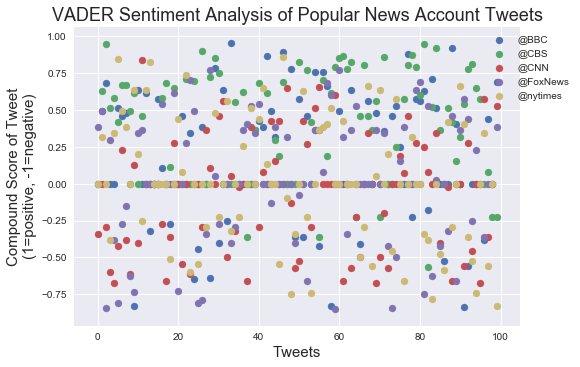

In [30]:
x_values = np.arange(100)


for news_source in twitter_accounts:
    
    plt.scatter(x_values, pivoted_df[news_source])

# legend
plt.legend(loc='upper right', bbox_to_anchor=(1.13, 1))

# title and axis labels
plt.title('VADER Sentiment Analysis of Popular News Account Tweets', fontsize=18)
plt.xlabel('Tweets', fontsize=15)
plt.ylabel('Compound Score of Tweet\n(1=positive, -1=negative)', fontsize=15)

# save plot
plt.savefig('sentiment_analysis_scatter.png')

plt.show()

In [16]:
grouped_df = news_sentiment_df.groupby('News_Source')

# calculate mean on compound scores
grouped_compound = grouped_df['compound'].mean()
grouped_compound

News_Source
@BBC        0.170004
@CBS        0.374197
@CNN       -0.072207
@FoxNews    0.018619
@nytimes    0.029772
Name: compound, dtype: float64

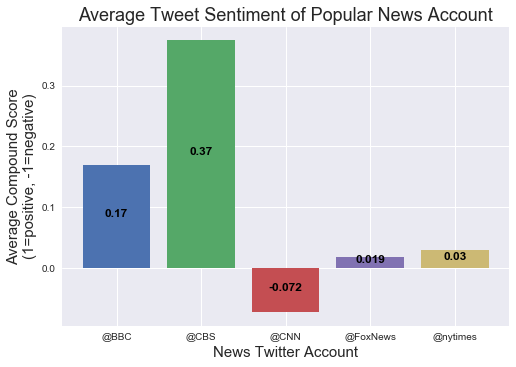

In [31]:
x_values = np.arange(len(twitter_accounts))

plot_data = zip(x_values, twitter_accounts)

for x, news_source in plot_data:
    
    y = grouped_compound[news_source]
    
    plt.bar(x, y)
    
    plt.text(x, y/2, '{:.2}'.format(y),
             horizontalalignment='center', color='black',
             fontsize=12, weight='bold')
    
# change xticks to news sources
plt.xticks(x_values, twitter_accounts)


# title and axis labels
plt.title('Average Tweet Sentiment of Popular News Account', fontsize=18)
plt.xlabel('News Twitter Account', fontsize=15)
plt.ylabel('Average Compound Score\n(1=positive, -1=negative)', fontsize=15)

# save plot
plt.savefig('average_sentiment_bar.png')

plt.show()